# 1. Importing Dependencies

In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 2. Generating Fictional Data

In [154]:
df = pd.read_csv('restaurant_ratings_dataset.csv')

In [155]:
df.sample(5)

,Location,Cuisine,Number_of_Reviews,Price_Range,Opening_Year,Rating
804,San Francisco,Italian,950,Cheap,2020,4.596890
376,Chicago,Italian,556,Expensive,2006,4.120935
119,Boston,Indian,501,Very Expensive,1992,4.217599
539,Miami,Japanese,508,Very Expensive,1994,4.231951
489,San Francisco,Indian,822,Very Expensive,1990,4.562046


# 3. Data Exploration and Visualization

In [156]:
df.describe()

,Number_of_Reviews,Opening_Year,Rating
count,1000.000000,1000.000000,1000.000000
mean,505.377000,2003.242000,4.312089
std,292.229918,11.701725,0.273887
min,10.000000,1984.000000,2.942832
25%,242.500000,1993.000000,4.151138
50%,526.500000,2004.000000,4.335261
75%,758.000000,2013.000000,4.525509
max,997.000000,2023.000000,4.699445


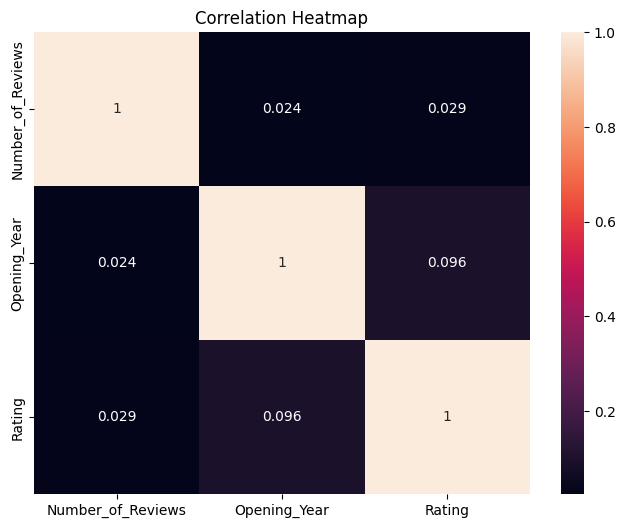

In [157]:
df_n = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(df_n.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

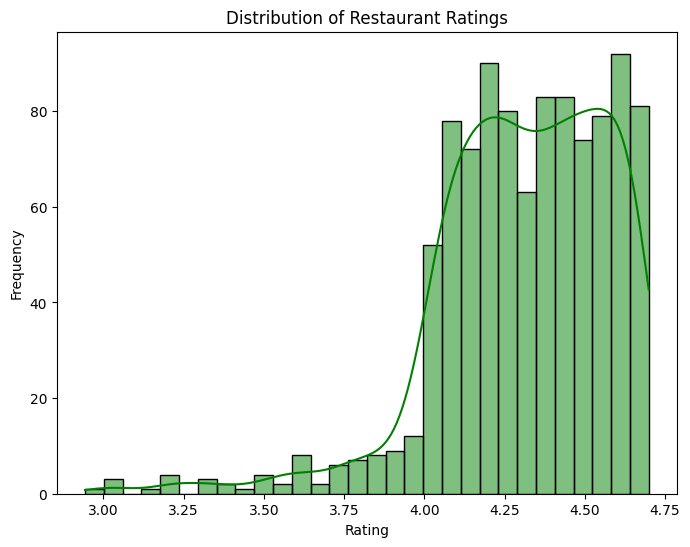

In [158]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], kde=True, color='green', bins=30)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 4. Feature Engineering and Splitting Data

In [159]:
# Split data
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [160]:
# Creating preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Number_of_Reviews', 'Opening_Year']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Location', 'Cuisine', 'Price_Range'])
    ])

In [161]:
# Creating gradient boosting regressor
gb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, random_state=42))
])

# 5. Modeling

In [162]:
# Fit and evaluate
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Gradient Boosting R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Gradient Boosting R-squared: -0.4134
Mean Squared Error: 0.0894


In [163]:
# Cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R-squared: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

Cross-validation R-squared: -0.1599 (±0.0815)


In [164]:
# Feature importance
feature_names = (
    ['Number_of_Reviews', 'Opening_Year'] +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(['Location', 'Cuisine', 'Price_Range']))
)
importances = gb_model.named_steps['regressor'].feature_importances_
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("\nTop Feature Importances:")
for name, importance in feature_importances[:5]:
    print(f"{name}: {importance:.4f}")


Top Feature Importances:
Number_of_Reviews: 0.5854
Opening_Year: 0.1855
Cuisine_Italian: 0.0376
Price_Range_Expensive: 0.0304
Location_Chicago: 0.0287
